**Федоров Сергей скб172**

# Домашняя работа №1

In [0]:
import numpy as np
from random import expovariate
s = expovariate(15)
s

0.0077865040069010055

(0, 12)

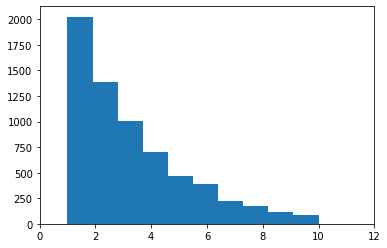

In [0]:
import matplotlib.pyplot as plt
import scipy.stats as ss
Lambda = 2.5
 #expected mean of exponential distribution is lambda in Scipy's parameterization
Size = 10000
trc_ex_rv = ss.expon.rvs(scale=Lambda, size=Size)
trc_ex_rv = trc_ex_rv[(trc_ex_rv>1)&(trc_ex_rv<10)]

plt.hist(trc_ex_rv)
plt.xlim(0, 12)


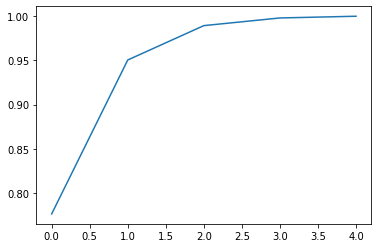

In [0]:
# CDF
import numpy as np
import matplotlib.pyplot as plt

lam = 1.5
plt.plot([(lambda x: 1-np.exp(1)**(-lam*x))(x) for x in range(1,6)])

## **Модель распределения Пуассона**

ВВедите лямбду 150
Введите кол-во испытаний 1000


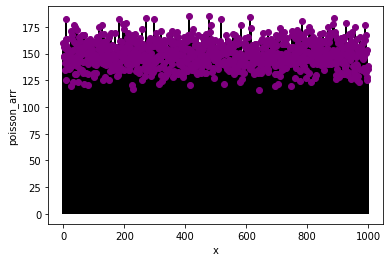

In [0]:
import numpy as np
import matplotlib.pyplot as plt
lam = float(input('ВВедите лямбду ')) 
poisson_arr = []
nupber = int(input('Введите кол-во испытаний ')) # лямбда 150 тест проводился на 1000 
s = np.exp(-lam)
r = s 
k = 0 
for k in range(nupber):
  s = np.exp(-lam)
  r = s 
  k = 0 
  alf = np.abs(np.random.uniform(-1,0))
  #alf  = np.random.rand()
  while alf > s:
    k += 1
    r *= lam/k
    s += r
  poisson_arr.append(k)
#print(k) # это искомая случайная величина


x = np.arange(0, nupber)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, poisson_arr, 'go',color='purple',)
ax.vlines(x, 0, poisson_arr, lw=2)
ax.set_xlabel('x')
ax.set_ylabel('poisson_arr')
plt.show()

Проверка смоделированной выборки.
Сравним функцию вероятности полученную с теоритической и на графиках увидим их соответсвие 


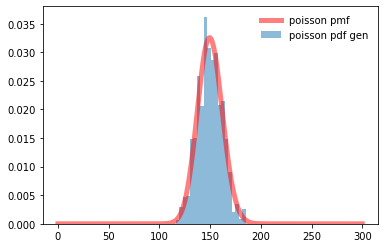

In [0]:
from scipy.stats import poisson
fig, ax = plt.subplots(1, 1)
k = np.linspace(0, lam*2,lam*2+1)
ax.plot(poisson.pmf(k, lam),'r-', lw=5, alpha=0.5, label='poisson pmf') # pmf - Probability mass function
#ax.hist(poisson_arr,bins=lam // 10, density=True, histtype='stepfilled', alpha=0.6, label='poisson pdf gen' , color='purple')
ax.hist(poisson_arr,bins=20, density=True, histtype='stepfilled', alpha=0.5, label='poisson pdf gen')
ax.legend(loc='best', frameon=False)
plt.show()

In [0]:
#k = np.linspace(np.arange(0, lam*2), lam*2)
#k[0]

In [0]:
#np.linspace(0, lam*2,lam*2+1)

Совпало бинго!  Чем больше лямба, тем графики более схожие :D 

Мне понравилась оценка временем в примере что вы показали и я хочу попробовать ее 

In [0]:
%%timeit 
np.random.gamma(5,0.2,100000)

100 loops, best of 3: 6.64 ms per loop


In [0]:
def my_poisson(lam,n):
  s = np.exp(-lam)
  r = s 
  k = 0 
  for k in range(n):
    s = np.exp(-lam)
    r = s 
    k = 0 
    alf = np.abs(np.random.uniform(-1,0))
    while alf > s:
      k += 1
      r *= lam/k
      s += r
    poisson_arr.append(k)
  return poisson_arr

In [0]:
%%timeit 
my_poisson(5,10000)

10 loops, best of 3: 75 ms per loop


In [0]:
%%timeit 
np.random.poisson(5,10000)

1000 loops, best of 3: 960 µs per loop


Эх я ему проигрываю из-за того что:  
1) у меня колаб и выполняю в виртуальной среде.

2) np.abs(np.random.uniform(-1,0)) ОЧЕНЬ замедляет

## **Моделирование Экспоненциального распределения**


Введите лямбду 5
Введите число 1000
x 0.04485952546787764 y 0.32096697626262405
0.20092272826844204
[0.12424231656148486, 0.5266542271301603, 0.06088872059832476, 0.6270229167760273, 0.042251035878428815, 0.04920330035249393, 0.0015137370473426652, 0.3160088036778424, 0.24685689718653175, 0.02565920842579829, 0.016448374711006377, 0.17732092273956968, 0.06997681819344784, 0.15692940440998285, 0.0469070816459103, 0.22656624056642272, 0.10853556207248097, 0.22300488668534135, 0.15673833598021947, 0.20383923712894458, 0.1933872798142676, 0.023859142241952888, 0.04404987214219071, 0.045649577617183495, 0.017495901464532216, 0.43165665327193514, 0.37754902583914574, 0.4064108438696538, 0.12172255452937855, 0.10758220204217134, 0.07871392423642337, 0.07215650995170746, 0.20899587848836243, 0.08079697079597402, 0.08080448573381999, 0.03651471484267182, 0.037463616413694584, 0.05150158149849703, 0.11165836410701524, 0.11104963937075432, 0.5398753601693937, 0.13450618893373467, 0.16169822249843

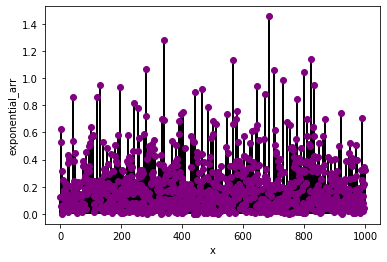

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
lam = float(input('Введите лямбду '))
number = int(input('Введите число '))
exponential_arr = []
for i in range(number):
  R = np.abs(np.random.uniform(-1,0)) # объяснено в tex
  x = -(1/lam)*math.log(1-R)
  y = -(1/lam)*math.log(R)
  exponential_arr.append(y)
print ("x", x, "y", y)
print(R)
print(exponential_arr)


x = np.arange(0, number)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, exponential_arr, 'go',color='purple',) # вывожу график точек )) 
ax.vlines(x, 0, exponential_arr, lw=2)
ax.set_xlabel('x')
ax.set_ylabel('exponential_arr')
plt.show()

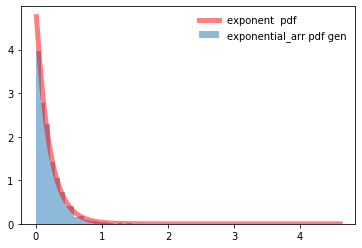

In [0]:
from scipy.stats import expon
fig, ax = plt.subplots(1, 1)
k = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 100) # разбиваем на отрезки 
ax.plot(k,expon.pdf(k,loc=0, scale=1/lam),'r-', lw=5, alpha=0.5, label='exponent  pdf') 
#ax.hist(poisson_arr,bins=lam // 10, density=True, histtype='stepfilled', alpha=0.6, label='exponential_arr pdf gen' , color='purple')
ax.hist(exponential_arr,bins=20, density=True, histtype='stepfilled', alpha=0.5, label='exponential_arr pdf gen')
ax.legend(loc='best', frameon=False)
plt.show()

Были у меня мысли сдаться с затеей использовать expon, но я не сдавался и пробовал пробовал ( не хочется к гамма идти ) Поэтому сделаю это максимально красиво и что бы прям графики совпадали. И видимо я победил эту библиотеку. =D  [ОНА](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon)

У них по умолчанию используется распределеие вида:   $f(x) = e^{-x}$, а нам нужно $f(x) = \lambda e^{-\lambda x}$, и что бы нам это получить нам нужно воспользоваться параметром scale = 1 / lambda. 


Что я и сделал в строке
ax.plot(expon.pdf(k,loc=0,  **scale=1/lam** ),'r-', lw=5, alpha=0.5, label='poisson pdf') 

lam вводился ранее
Остался вопрос открытый про масштабирование и количество точек. Но этот вопрос решается через matplotlib. И пока эту проблему я буду конпенсировать количеством точек. 
  <проблема решена. Обозначением значений по оси абцисс в строке:
ax.plot(**k**,expon.pdf(k,loc=0, scale=1/lam),'r-', lw=5, alpha=0.5, label='exponent  pdf') > Теперь все красиво и идеально 





Графики примерно совпали ! Ура ^^



---



# **Домашняя работа №2**



## 2.1 Моделирование выбранных случайных величин

Для каждой из выбранных случайных величин необходимо построить по 5
реализаций выборок следующий объемов n: n ∈ {5, 10, 100, 1000, $10^5$ }. То есть
всего 50 различных выборок. В бумажной версии отчета должны быть при-
ведены выборки для n = 5 и n = 10.

### Для распределения Пуассона

In [0]:
import numpy as np
def poisonFun(lam, n, c):
  poisson_arr = []
  s = np.exp(-lam)
  r = s 
  k = 0 
  for k in range(n):
    s = np.exp(-lam)
    r = s 
    k = 0 
    alf = np.abs(np.random.uniform(-1,0))
    #alf  = np.random.rand()
    while alf > s:
      k += 1
      r *= lam/k
      s += r
    poisson_arr.append(k)
  print(poisson_arr)
  # my_file.write(str(poisson_arr) + '\n')
  c.append(poisson_arr)

# lam = float(input('ВВедите лямбду ')) 
# n = [5,10,100,1000] # объемы


# for a in n:
  # print('n = ', a)
  # for c in range(5):
    # poisonFun(lam, a)
    


lam = float(input('Введите лямбду '))
poison5 = []
print('n = 5')
for c in range(5):
    poisonFun(lam, 5,poison5)



print('n = 10')
poison10 = []
for c in range(5):
    poisonFun(lam, 10, poison10)



print('n = 100')
poison100 = []
for c in range(5):
    poisonFun(lam, 100, poison100)


poison1000 = []
print('n = 1000')
for c in range(5):
    poisonFun(lam, 1000, poison1000)



Введите лямбду 5
n = 5
[7, 3, 5, 6, 4]
[3, 4, 3, 2, 6]
[6, 8, 3, 6, 8]
[2, 3, 5, 3, 10]
[5, 6, 6, 4, 4]
n = 10
[7, 4, 8, 3, 5, 3, 5, 5, 7, 5]
[4, 4, 8, 11, 1, 5, 3, 4, 5, 6]
[0, 7, 4, 8, 5, 5, 3, 4, 8, 3]
[3, 4, 6, 6, 5, 8, 3, 4, 3, 5]
[6, 2, 5, 6, 6, 5, 4, 7, 4, 7]
n = 100
[6, 1, 6, 5, 6, 2, 4, 5, 3, 3, 5, 9, 4, 4, 1, 5, 5, 7, 2, 4, 6, 1, 3, 6, 6, 10, 6, 6, 2, 1, 4, 6, 6, 6, 3, 6, 10, 5, 3, 4, 4, 2, 2, 3, 5, 4, 4, 5, 4, 4, 2, 2, 2, 2, 5, 6, 8, 5, 5, 9, 7, 4, 5, 8, 8, 4, 2, 8, 11, 6, 1, 8, 5, 2, 3, 2, 7, 3, 0, 2, 6, 3, 3, 3, 7, 6, 6, 5, 4, 3, 10, 7, 5, 4, 4, 4, 5, 4, 8, 5]
[1, 6, 5, 5, 5, 2, 2, 4, 3, 2, 7, 8, 9, 4, 8, 4, 11, 4, 7, 2, 5, 5, 4, 2, 3, 5, 3, 4, 3, 4, 8, 5, 6, 8, 7, 3, 9, 4, 7, 8, 4, 10, 5, 6, 6, 9, 6, 2, 6, 5, 1, 6, 3, 4, 8, 6, 7, 6, 6, 5, 9, 6, 7, 3, 6, 5, 2, 10, 9, 4, 4, 4, 6, 5, 6, 5, 6, 6, 5, 7, 7, 8, 5, 5, 4, 6, 2, 6, 6, 1, 3, 8, 8, 4, 5, 6, 6, 7, 1, 7]
[5, 6, 7, 4, 5, 12, 3, 5, 5, 6, 4, 6, 7, 11, 6, 9, 6, 7, 3, 3, 3, 4, 6, 6, 5, 6, 5, 9, 6, 4, 4, 1, 4, 6, 10, 6, 5, 7

И для $10^{5}$ не советую крутить вправо ) 

In [0]:
poison10005 = []

print('n = 10*5')
for c in range(5):
    poisonFun(lam, 10**5, poison10005)



n = 10*5
[4, 3, 6, 3, 5, 4, 6, 6, 2, 5, 4, 7, 9, 3, 6, 7, 2, 2, 5, 4, 4, 4, 2, 8, 6, 7, 8, 2, 4, 4, 5, 1, 5, 8, 4, 3, 4, 2, 6, 3, 2, 3, 6, 3, 8, 8, 2, 4, 4, 4, 5, 6, 5, 6, 3, 7, 7, 1, 4, 2, 5, 8, 5, 2, 2, 5, 3, 2, 3, 7, 5, 3, 9, 4, 1, 7, 4, 6, 8, 4, 6, 6, 5, 5, 6, 3, 5, 7, 9, 5, 3, 3, 9, 3, 3, 4, 4, 2, 4, 2, 3, 6, 4, 3, 8, 11, 4, 6, 2, 4, 5, 6, 6, 4, 5, 7, 5, 5, 4, 5, 5, 4, 5, 10, 1, 2, 9, 3, 1, 8, 3, 2, 10, 4, 7, 7, 9, 7, 11, 5, 8, 4, 3, 3, 6, 5, 5, 4, 2, 2, 5, 3, 9, 5, 8, 4, 3, 6, 6, 3, 3, 4, 2, 7, 2, 1, 8, 1, 3, 7, 8, 5, 2, 9, 3, 3, 3, 4, 5, 8, 4, 7, 6, 5, 5, 2, 5, 4, 8, 6, 2, 6, 5, 4, 5, 2, 5, 3, 5, 7, 9, 5, 4, 8, 1, 4, 4, 5, 4, 4, 4, 5, 6, 9, 3, 6, 8, 4, 6, 3, 10, 2, 7, 4, 6, 7, 3, 4, 4, 2, 7, 4, 4, 10, 8, 2, 6, 1, 2, 5, 4, 5, 4, 3, 3, 2, 11, 6, 7, 2, 1, 2, 3, 3, 7, 5, 4, 2, 6, 5, 1, 7, 5, 6, 6, 8, 6, 2, 6, 3, 11, 4, 10, 6, 4, 5, 7, 3, 2, 7, 6, 7, 4, 7, 1, 2, 4, 5, 2, 4, 5, 3, 5, 7, 2, 3, 5, 1, 3, 10, 7, 4, 6, 4, 5, 3, 8, 3, 2, 4, 6, 2, 5, 4, 11, 3, 10, 6, 3, 5, 9, 9, 8, 5, 8, 9, 

### Для экспоненциального распределения 

In [0]:
import numpy as np
import math
def expoon(lam, n, c):
  exponential_arr = []
  for i in range(n):
    R = np.abs(np.random.uniform(-1,0)) # объяснено в tex
    x = -(1/lam)*math.log(1-R)
    y = -(1/lam)*math.log(R)
    exponential_arr.append(float('{:.2f}'.format(y)))
  print(exponential_arr)
  c.append(exponential_arr)


lam = float(input('Введите лямбду '))

expan5 = []
print('n = 5')
for c in range(5):
    expoon(lam, 5, expan5)

expan10 = []
print('n = 10')
for c in range(5):
    expoon(lam, 10, expan10)


expan100 = []
print('n = 100')
for c in range(5):
    expoon(lam, 100, expan100)

expan1000 = []
print('n = 10000')
for c in range(5):
    expoon(lam, 1000, expan1000)




Введите лямбду 5
n = 5
[0.02, 0.19, 0.03, 0.03, 0.05]
[0.13, 0.42, 0.1, 0.19, 0.04]
[0.03, 0.01, 0.06, 0.06, 0.28]
[0.02, 0.0, 0.09, 0.27, 0.08]
[0.08, 0.77, 0.57, 0.18, 0.02]
n = 10
[0.13, 0.1, 0.6, 0.06, 0.63, 0.12, 0.03, 0.34, 0.13, 0.25]
[0.09, 0.02, 0.16, 0.18, 0.01, 0.1, 0.01, 0.07, 0.03, 0.12]
[0.84, 0.02, 0.13, 0.21, 0.12, 0.2, 0.11, 0.21, 0.17, 0.07]
[0.71, 0.01, 0.32, 0.1, 0.04, 0.63, 0.14, 0.29, 0.03, 0.18]
[0.14, 0.27, 0.45, 0.22, 0.04, 0.03, 0.15, 0.11, 0.79, 0.19]
n = 100
[0.05, 0.09, 0.04, 0.03, 0.25, 0.07, 0.16, 0.11, 0.49, 0.48, 0.05, 0.06, 0.33, 0.0, 0.2, 0.93, 0.46, 0.26, 0.11, 0.77, 0.13, 0.25, 0.4, 0.34, 0.24, 0.03, 0.3, 0.14, 0.02, 0.21, 0.19, 0.17, 0.01, 0.12, 0.03, 0.31, 0.2, 0.25, 0.19, 0.01, 0.05, 0.54, 0.12, 0.08, 0.05, 0.6, 0.19, 0.16, 0.1, 0.04, 0.18, 0.59, 0.02, 0.25, 0.37, 0.16, 0.03, 0.09, 0.38, 0.18, 0.28, 0.0, 0.01, 0.35, 0.14, 0.1, 0.25, 0.03, 0.16, 0.33, 0.37, 0.1, 0.09, 0.19, 0.08, 0.08, 0.01, 0.02, 0.58, 0.1, 0.2, 0.82, 0.24, 0.17, 0.26, 0.54, 0.29

И для $10^{5}$ не советую крутить вправо ) 

In [0]:
import numpy as np # Пришлось делать отдельно так как это особый случай который требует много времени :) 
import math
def expoon(lam, n):
  exponential_arr = []
  for i in range(n):
    R = np.abs(np.random.uniform(-1,0)) # объяснено в tex
    x = -(1/lam)*math.log(1-R)
    y = -(1/lam)*math.log(R)
    exponential_arr.append(float('{:.2f}'.format(y)))
  expan10005.append(exponential_arr)

expan10005 = []
print('n = 10**5')

for c in range(5):
    expoon(lam, 10**5,)

expan10005 # так выводит ) 

n = 10**5


[[0.05,
  0.07,
  0.1,
  0.04,
  0.68,
  0.06,
  1.1,
  0.01,
  0.02,
  0.11,
  0.03,
  0.1,
  0.07,
  0.14,
  0.09,
  0.1,
  0.22,
  0.03,
  0.06,
  0.38,
  0.18,
  0.07,
  0.19,
  0.01,
  0.11,
  0.09,
  0.4,
  0.33,
  0.46,
  0.08,
  0.55,
  0.21,
  0.07,
  0.92,
  0.2,
  0.09,
  0.07,
  0.29,
  0.18,
  0.13,
  0.06,
  0.38,
  0.04,
  0.12,
  0.39,
  0.38,
  0.02,
  0.29,
  0.14,
  0.21,
  0.06,
  0.49,
  0.04,
  0.17,
  0.04,
  0.36,
  0.3,
  0.03,
  0.09,
  0.11,
  0.23,
  0.04,
  0.01,
  0.06,
  0.04,
  0.57,
  0.91,
  0.06,
  0.03,
  0.19,
  0.22,
  0.05,
  0.05,
  0.03,
  0.14,
  0.08,
  0.11,
  0.05,
  0.03,
  0.15,
  0.11,
  0.02,
  0.04,
  0.1,
  0.03,
  0.06,
  0.13,
  0.07,
  0.05,
  0.47,
  0.25,
  0.08,
  0.02,
  0.01,
  0.01,
  0.23,
  0.1,
  0.27,
  0.07,
  0.3,
  0.4,
  1.1,
  0.05,
  0.07,
  1.24,
  0.0,
  0.38,
  0.24,
  0.03,
  0.1,
  0.34,
  0.08,
  0.15,
  0.02,
  0.04,
  0.12,
  0.09,
  0.16,
  0.44,
  0.06,
  1.05,
  0.05,
  0.07,
  0.03,
  0.09,
  0.09,
  0.1,

## 2.2 Построение эмпирической функции распределения

Для каждой выборки необходимо построить эмпирическую функцию распределения. Графики необходимо привести в отчете. На одном графике необходимо отобразить эмпирическую функцию распределения и график функции
распределения случайной величины. Для каждого n ∈ {5, 10, 100, 1000, $10^5$} необходимо найти точную верхнюю границу разности каждой пары эмпирических функций распределения
(то есть для каждого n необходимо найти  (5/2) чисел чисел).

### 2.2.1 Эмпирической функция распределения Пуассона

![теория](https://c.radikal.ru/c21/1910/16/746f47e2311b.png)

#### 2.2.2 Эмпирическая функция

Сначала отсортируем массивы по возрастанию 

In [0]:
def sortmas(r,arr):
  for i in range(5):
    r[i].sort()
    # print('c', r[i]) 
    sum = 1
    for k in range(len(r[i])-1):   # создадим массив число и кол-во
      if r[i][k] != r[i][k+1]:
        # print(r[i].count(r[i][k]))
        g = [r[i][k], r[i].count(r[i][k])]
        # frequencypoison5.append(g)
        arr.append(g)
      else:
        k+=1
    g = [r[i][len(r[i])-1], r[i].count(r[i][len(r[i])-1])]
    # frequencypoison5.append(g)
    arr.append(g)
    g = [-1, -1]              # добавим на всякий случай разделяющий [-1,-1] так как такого не может быть 
    # frequencypoison5.append(g)
    arr.append(g)
    # print(r[i].count(7))

def printingemp(mas, Volume):
  
  i = 0
  sum = 0 
  n = 1
  while i < len(mas)-1:
    print('Empirical distribution function = ', Volume, 'number', n)
    print('0 if x < ', mas[i][0])
    sum += mas[i][1]
    i+=1
    while mas[i][0] != -1: 
      print(sum/Volume, 'if in ', mas[i-1][0]," < x <=", mas[i][0])
      sum+= mas[i][1]
      i+=1
    print('1 if >', mas[i-1][0])
    i+=1
    sum = 0 
    n += 1






frequencypoison5 = []
sortmas(poison5, frequencypoison5) 
# print(poison5)
print(frequencypoison5)
   
printingemp(frequencypoison5, len(poison5[1]))




[[3, 1], [5, 2], [6, 2], [-1, -1], [3, 1], [4, 2], [6, 2], [-1, -1], [3, 1], [4, 1], [7, 2], [8, 1], [-1, -1], [1, 1], [4, 1], [6, 2], [8, 1], [-1, -1], [4, 3], [6, 1], [8, 1], [-1, -1]]
Empirical distribution function =  5 number 1
0 if x <  3
0.2 if in  3  < x <= 5
0.6 if in  5  < x <= 6
1 if > 6
Empirical distribution function =  5 number 2
0 if x <  3
0.2 if in  3  < x <= 4
0.6 if in  4  < x <= 6
1 if > 6
Empirical distribution function =  5 number 3
0 if x <  3
0.2 if in  3  < x <= 4
0.4 if in  4  < x <= 7
0.8 if in  7  < x <= 8
1 if > 8
Empirical distribution function =  5 number 4
0 if x <  1
0.2 if in  1  < x <= 4
0.4 if in  4  < x <= 6
0.8 if in  6  < x <= 8
1 if > 8
Empirical distribution function =  5 number 5
0 if x <  4
0.6 if in  4  < x <= 6
0.8 if in  6  < x <= 8
1 if > 8


Теперь для 10, 100, 1000

Для 10 

In [0]:
frequencypoison10 = []
sortmas(poison10, frequencypoison10) 
print(poison10)
print(frequencypoison10)
printingemp(frequencypoison10, len(poison10[1]))

[[1, 3, 3, 4, 4, 6, 6, 7, 7, 8], [1, 2, 3, 4, 5, 5, 7, 7, 8, 8], [2, 3, 4, 4, 5, 5, 5, 6, 8, 9], [3, 3, 4, 4, 5, 6, 6, 6, 7, 10], [2, 2, 2, 3, 3, 3, 4, 6, 7, 9]]
[[1, 1], [3, 2], [4, 2], [6, 2], [7, 2], [8, 1], [-1, -1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 2], [7, 2], [8, 2], [-1, -1], [2, 1], [3, 1], [4, 2], [5, 3], [6, 1], [8, 1], [9, 1], [-1, -1], [3, 2], [4, 2], [5, 1], [6, 3], [7, 1], [10, 1], [-1, -1], [2, 3], [3, 3], [4, 1], [6, 1], [7, 1], [9, 1], [-1, -1]]
Empirical distribution function =  10 number 1
0 if x <  1
0.1 if in  1  < x <= 3
0.3 if in  3  < x <= 4
0.5 if in  4  < x <= 6
0.7 if in  6  < x <= 7
0.9 if in  7  < x <= 8
1 if > 8
Empirical distribution function =  10 number 2
0 if x <  1
0.1 if in  1  < x <= 2
0.2 if in  2  < x <= 3
0.3 if in  3  < x <= 4
0.4 if in  4  < x <= 5
0.6 if in  5  < x <= 7
0.8 if in  7  < x <= 8
1 if > 8
Empirical distribution function =  10 number 3
0 if x <  2
0.1 if in  2  < x <= 3
0.2 if in  3  < x <= 4
0.4 if in  4  < x <= 5
0.7 if in  5 

Для 100

In [0]:
frequencypoison100 = []
sortmas(poison100, frequencypoison100) 
print(poison100)
print(frequencypoison100)
   
printingemp(frequencypoison100, len(poison100[1]))

[[0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 10, 10, 10], [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 10, 10, 12], [0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 10, 11], [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 

ДЛЯ 1000

In [0]:
frequencypoison1000 = []
sortmas(poison1000, frequencypoison1000) 
print(poison1000)
print(frequencypoison1000)
   
printingemp(frequencypoison1000, len(poison1000[1]))

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Для $10^5$

In [0]:
frequencypoison10005 = []
sortmas(poison10005, frequencypoison10005) 
print(poison10005)
print(frequencypoison10005)
   
printingemp(frequencypoison10005, len(poison10005[1]))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 2.2.3 Строим графики

Будем строить графики. 
Спусти мин 5 гугления Я нашел [функция для вывода прямых](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hlines.html) Поэтому подготовим массивы для него :) 





**Для 5**

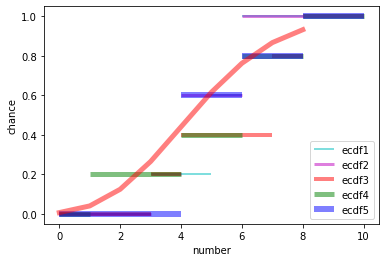

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson 

def plotty(mas, Volume):
  xmin = []
  xmax = []
  y = []
  i = 0
  sum = 0 
  n = 1
  rgb = 'cmrgb' # добавим цветов графикам 
  maxxX = max(max(mas)) 
  # print('trgkrmgrmkg-----------------val = ' , Volume, ' min = ', min, ' max = ', maxxX)
  # k = np.linspace(0, maxxX+1, Volume)
  # print(k)
  # k = np.linspace(0, lam*2,lam*2+1)
  k = np.linspace(0, maxxX,maxxX+1)
  while i < len(mas)-1:
    # print('Empirical distribution function = ', Volume, 'number', n)
    xmin.append(0)
    xmax.append(mas[i][0])
    y.append(0)
    # print('0 if x < ', mas[i][0])
    sum += mas[i][1]
    i+=1
    while mas[i][0] != -1: 
      xmin.append(mas[i-1][0])
      xmax.append(mas[i][0])
      y.append(sum/Volume)
      # print(sum/Volume, 'if in ', mas[i-1][0]," < x <=", mas[i][0])
      sum+= mas[i][1]
      i+=1
    y.append(1)
    xmin.append(mas[i-1][0])
    xmax.append(mas[i-1][0] + 2)
    # print('1 if >', mas[i-1][0])
    i+=1
    sum = 0 
    # print('xmin = ', xmin, 'xmax ',xmax ,'y',y)
    plt.xlabel('number')
    plt.ylabel('chance')
    plt.hlines(y, xmin, xmax, alpha = 0.5, color = rgb[n-1],label = 'ecdf{k}'.format(k = n), lw=n+1)
    n +=1
    ax.legend(loc = 'lower right', frameon=True)
    # тут строить график 
    xmin = []
    xmax = []
    y = []
  plt.plot(poisson.cdf(k, lam),'r-', lw=5, alpha=0.5, label='poisson pmf')
  plt.show()
  # print('xmin = ', xmin, 'xmax ',xmax ,'y',y)


fig,ax = plt.subplots(1,1)      



# print('tuuuuutt ',frequencypoison5)

plotty(frequencypoison5, len(poison5[1]))









**Выведем для 10**

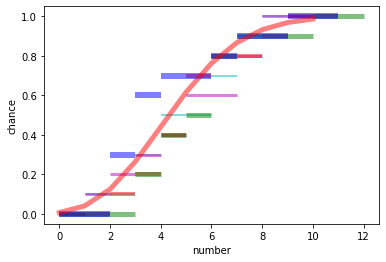

In [0]:
plotty(frequencypoison10, len(poison10[1]))

**Для 100**

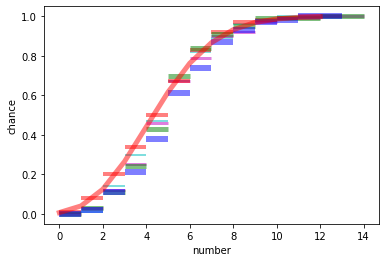

In [0]:
plotty(frequencypoison100, len(poison100[1]))

**Для 1000**

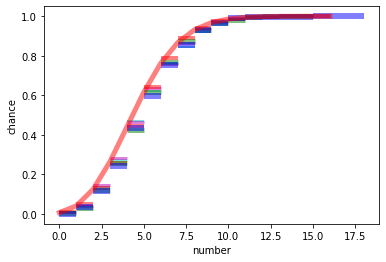

In [0]:
plotty(frequencypoison1000, len(poison1000[1]))

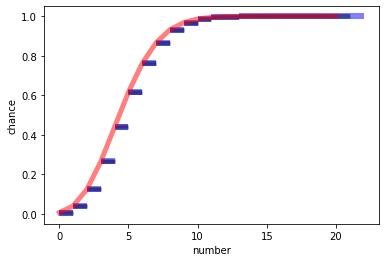

In [0]:
plotty(frequencypoison10005, len(poison10005[1]))

Это какая-то магия, в зависимости от объема выборки. Чем больше объем, тем  эмпетическая функция больше похожа на теоритическую функции распределения. 

#### 2.2.4 поиск верхней границы разности каждой пары эмпирических функций

Осталось Для каждого n ∈ {5, 10, 100, 1000, $10^5$ } необходимо найти точную верхнюю границу разности каждой пары эмпирических функций распределения
(то есть для каждого n необходимо найти  $C_5^2$ чисел).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
def vverx(mas, Volume):
  massiv = []
  # print(massiv)
  xmin = []
  xmax = []
  y = []
  i = 0
  sum = 0 
  n = 1
  while i < len(mas)-1:
    # print('Empirical distribution function = ', Volume, 'number', n)
    xmin.append(0)
    xmax.append(mas[i][0])
    y.append(0)
    # print('0 if x < ', mas[i][0])
    sum += mas[i][1]
    i+=1
    while mas[i][0] != -1: 
      xmin.append(mas[i-1][0])
      xmax.append(mas[i][0])
      y.append(sum/Volume)
      # print(sum/Volume, 'if in ', mas[i-1][0]," < x <=", mas[i][0])
      sum+= mas[i][1]
      i+=1
    y.append(1)
    xmin.append(mas[i-1][0])
    xmax.append(mas[i-1][0] + 2)
    # print('1 if >', mas[i-1][0])
    i+=1
    sum = 0 
    # print('xmin = ', xmin, 'xmax ',xmax ,'y',y)
    massiv.append(xmin)
    massiv.append(xmax)
    massiv.append(y)
    n +=1
    # тут строить график 
    xmin = []
    xmax = []
    y = []
  # print(massiv)
  # А теперь будем искать максимальную верхную границу :) 
  fg, ff, max = 0, 0, 0
  for l in range(5):
    # # ----------------------------   ввывод всех эл
    # print('в данный момент что с левая часть ',l)
    # print('0 =', massiv[l*3]) # xmin
    # print('1 =', massiv[1+l*3]) #xmax
    # print('2 =', massiv[2+l*3]) # y
    # # ----------------------------   ввывод всех эл    
    for y in range(len(massiv[l*3])):
      for cc in range(l+1, 5):
        for gg in range(len(massiv[cc*3])):
          # print('x',massiv[l*3][y] , 'y', massiv[1+l*3][y])
                #, 'x1', massiv[cc*3][y] ,'y2', massiv[cc+l*3][y])
          # print('tut', 'l chikll = ', l,'y chikl', y, 'cc', cc )
          # print('0 =', massiv[cc*3]) # xmin
          # print('1 =', massiv[1+cc*3]) # xmax
          # print('2 =', massiv[2+cc*3]) # y
          if  massiv[l*3][y] == massiv[cc*3][gg] and massiv[1+l*3][y] == massiv[1+cc*3][gg]:
            # print('yraaaaaaaaaaaaaaaaaaaa', 'massiv[l*3][y] = ',massiv[l*3][y], ' massiv[1+l*3][y] =', massiv[1+l*3][y])
            if max < abs(massiv[2+l*3][y] - massiv[2+cc*3][gg]): 
              max = abs(massiv[2+l*3][y] - massiv[2+cc*3][gg])
  print('max =', max )  





        # for kk in range(len(massiv[l*3])):
        #   for hh in range(len(massiv[cc*3])): 
        #     if hh >= len(massiv[cc*3]) or kk>=len(massiv[1+l*3]):
        #       continue
        #     else:
        #       print('massiv[l*3][kk] =',massiv[l*3][kk], 'massiv[cc*3][hh] = ',massiv[cc*3][hh] )
        #       print('                                     ', 'massiv[1+l*3][kk] = ',massiv[1+l*3][kk], 'massiv[1+cc*3][hh-1]', massiv[1+cc*3][hh-1] )
        #       if (massiv[l*3][kk] == massiv[cc*3][hh]) and (massiv[1+l*3][kk] == massiv[1+cc*3][hh]):
        #         print('kkkkkkkkkkkkkkkkkkkkkkkkkkkkk = ', hh , ' massiv[l*3][hh-1] = ', massiv[l*3][hh] , 'len(massiv[l*3]) =', len(massiv[l*3]) , 'len(massiv[cc*3]) = ',len(massiv[cc*3]))
        #         print('llllllllllllllllllllllllllllllll = ', massiv[l*3][hh])
        #         print('yraaaa  x = ' , massiv[l*3][hh], ' yraa y = ', massiv[1+cc*3][hh] ) 
        #         print(' raznicha = ', abs(massiv[2+l*3][kk] - massiv[2+cc*3][hh]))
        #         if max < abs(massiv[2+l*3][kk] - massiv[2+cc*3][hh]):
        #           max = abs(massiv[2+l*3][kk] - massiv[2+cc*3][hh])
        #           print('fdsfsdf = ', max)
# print('tuuuuutt ',frequencypoison5)

vverx(frequencypoison5, len(poison5[1]))


max = 0.19999999999999996


А теперь выведем макс для разных 

**Для 10**

In [0]:
vverx(frequencypoison10, len(poison10[1]))


max = 0.39999999999999997


**Для 100**

In [0]:
vverx(frequencypoison100, len(poison100[1]))


max = 0.13000000000000003


**Для 1000**

In [0]:
vverx(frequencypoison1000, len(poison1000[1]))


max = 0.049000000000000044


**Для $10^5$**

In [0]:
vverx(frequencypoison10005, len(poison10005[1]))


max = 0.005750000000000033


### 2.2.5 эмпирическая функция для экспоненциального

**Для 5 ти**

In [0]:
frequencyexpan5 = []
sortmas(expan5, frequencyexpan5) 

# print(frequencyexpan5)
   
printingemp(frequencyexpan5, len(expan5[1]))

Empirical distribution function =  5 number 1
0 if x <  0.09
0.2 if in  0.09  < x <= 0.14
0.4 if in  0.14  < x <= 0.22
0.6 if in  0.22  < x <= 0.3
0.8 if in  0.3  < x <= 0.31
1 if > 0.31
Empirical distribution function =  5 number 2
0 if x <  0.02
0.2 if in  0.02  < x <= 0.16
0.6 if in  0.16  < x <= 0.18
0.8 if in  0.18  < x <= 0.23
1 if > 0.23
Empirical distribution function =  5 number 3
0 if x <  0.03
0.2 if in  0.03  < x <= 0.1
0.4 if in  0.1  < x <= 0.15
0.6 if in  0.15  < x <= 0.17
0.8 if in  0.17  < x <= 0.75
1 if > 0.75
Empirical distribution function =  5 number 4
0 if x <  0.03
0.2 if in  0.03  < x <= 0.05
0.4 if in  0.05  < x <= 0.13
0.6 if in  0.13  < x <= 0.17
0.8 if in  0.17  < x <= 0.3
1 if > 0.3
Empirical distribution function =  5 number 5
0 if x <  0.05
0.2 if in  0.05  < x <= 0.15
0.4 if in  0.15  < x <= 0.45
0.6 if in  0.45  < x <= 0.61
0.8 if in  0.61  < x <= 0.77
1 if > 0.77


**Для 10 ти**

In [0]:
frequencyexpan10 = []
sortmas(expan10, frequencyexpan10) 

# print(frequencyexpan5)
   
printingemp(frequencyexpan10, len(expan10[1]))

Empirical distribution function =  10 number 1
0 if x <  0.0
0.1 if in  0.0  < x <= 0.02
0.2 if in  0.02  < x <= 0.18
0.3 if in  0.18  < x <= 0.22
0.4 if in  0.22  < x <= 0.24
0.5 if in  0.24  < x <= 0.28
0.6 if in  0.28  < x <= 0.31
0.7 if in  0.31  < x <= 0.36
0.8 if in  0.36  < x <= 0.39
0.9 if in  0.39  < x <= 0.58
1 if > 0.58
Empirical distribution function =  10 number 2
0 if x <  0.06
0.1 if in  0.06  < x <= 0.07
0.2 if in  0.07  < x <= 0.09
0.3 if in  0.09  < x <= 0.1
0.4 if in  0.1  < x <= 0.18
0.6 if in  0.18  < x <= 0.32
0.7 if in  0.32  < x <= 0.36
0.8 if in  0.36  < x <= 0.45
0.9 if in  0.45  < x <= 0.71
1 if > 0.71
Empirical distribution function =  10 number 3
0 if x <  0.01
0.1 if in  0.01  < x <= 0.03
0.2 if in  0.03  < x <= 0.04
0.3 if in  0.04  < x <= 0.08
0.4 if in  0.08  < x <= 0.2
0.5 if in  0.2  < x <= 0.22
0.6 if in  0.22  < x <= 0.26
0.7 if in  0.26  < x <= 0.32
0.8 if in  0.32  < x <= 0.35
0.9 if in  0.35  < x <= 0.45
1 if > 0.45
Empirical distribution functio

**Для 100**

In [0]:
frequencyexpan100 = []
sortmas(expan100, frequencyexpan100) 

# print(frequencyexpan100)
   
printingemp(frequencyexpan100, len(expan100[1]))

Empirical distribution function =  100 number 1
0 if x <  0.0
0.04 if in  0.0  < x <= 0.01
0.06 if in  0.01  < x <= 0.02
0.13 if in  0.02  < x <= 0.03
0.19 if in  0.03  < x <= 0.04
0.24 if in  0.04  < x <= 0.05
0.26 if in  0.05  < x <= 0.06
0.29 if in  0.06  < x <= 0.07
0.31 if in  0.07  < x <= 0.08
0.34 if in  0.08  < x <= 0.09
0.4 if in  0.09  < x <= 0.1
0.45 if in  0.1  < x <= 0.11
0.48 if in  0.11  < x <= 0.12
0.49 if in  0.12  < x <= 0.13
0.56 if in  0.13  < x <= 0.14
0.59 if in  0.14  < x <= 0.15
0.6 if in  0.15  < x <= 0.16
0.63 if in  0.16  < x <= 0.17
0.65 if in  0.17  < x <= 0.19
0.66 if in  0.19  < x <= 0.2
0.67 if in  0.2  < x <= 0.21
0.68 if in  0.21  < x <= 0.22
0.71 if in  0.22  < x <= 0.24
0.73 if in  0.24  < x <= 0.25
0.74 if in  0.25  < x <= 0.27
0.75 if in  0.27  < x <= 0.28
0.76 if in  0.28  < x <= 0.29
0.78 if in  0.29  < x <= 0.3
0.81 if in  0.3  < x <= 0.33
0.82 if in  0.33  < x <= 0.36
0.84 if in  0.36  < x <= 0.38
0.85 if in  0.38  < x <= 0.4
0.86 if in  0.4  <

**Для 1000**

In [0]:
frequencyexpan1000 = []
sortmas(expan1000, frequencyexpan1000) 

# print(frequencyexpan5)
   
printingemp(frequencyexpan1000, len(expan1000[1]))

Empirical distribution function =  1000 number 1
0 if x <  0.0
0.03 if in  0.0  < x <= 0.01
0.078 if in  0.01  < x <= 0.02
0.126 if in  0.02  < x <= 0.03
0.155 if in  0.03  < x <= 0.04
0.198 if in  0.04  < x <= 0.05
0.233 if in  0.05  < x <= 0.06
0.267 if in  0.06  < x <= 0.07
0.303 if in  0.07  < x <= 0.08
0.342 if in  0.08  < x <= 0.09
0.379 if in  0.09  < x <= 0.1
0.403 if in  0.1  < x <= 0.11
0.428 if in  0.11  < x <= 0.12
0.445 if in  0.12  < x <= 0.13
0.473 if in  0.13  < x <= 0.14
0.509 if in  0.14  < x <= 0.15
0.534 if in  0.15  < x <= 0.16
0.557 if in  0.16  < x <= 0.17
0.579 if in  0.17  < x <= 0.18
0.605 if in  0.18  < x <= 0.19
0.624 if in  0.19  < x <= 0.2
0.641 if in  0.2  < x <= 0.21
0.655 if in  0.21  < x <= 0.22
0.672 if in  0.22  < x <= 0.23
0.693 if in  0.23  < x <= 0.24
0.707 if in  0.24  < x <= 0.25
0.719 if in  0.25  < x <= 0.26
0.732 if in  0.26  < x <= 0.27
0.742 if in  0.27  < x <= 0.28
0.758 if in  0.28  < x <= 0.29
0.771 if in  0.29  < x <= 0.3
0.781 if in  0

**Для $10^5$** долго но делает ) с бубнами... лучше не перезапускать.)))




In [0]:
frequencyexpan10005 = []
sortmas(expan10005, frequencyexpan10005) 

# print(frequencyexpan5)
   
printingemp(frequencyexpan10005, len(expan10005[1]))

Empirical distribution function =  100000 number 1
0 if x <  0.0
0.02432 if in  0.0  < x <= 0.01
0.07192 if in  0.01  < x <= 0.02
0.11719 if in  0.02  < x <= 0.03
0.16026 if in  0.03  < x <= 0.04
0.20191 if in  0.04  < x <= 0.05
0.24135 if in  0.05  < x <= 0.06
0.278 if in  0.06  < x <= 0.07
0.31287 if in  0.07  < x <= 0.08
0.34635 if in  0.08  < x <= 0.09
0.38004 if in  0.09  < x <= 0.1
0.40951 if in  0.1  < x <= 0.11
0.43818 if in  0.11  < x <= 0.12
0.46575 if in  0.12  < x <= 0.13
0.49155 if in  0.13  < x <= 0.14
0.51559 if in  0.14  < x <= 0.15
0.53918 if in  0.15  < x <= 0.16
0.56149 if in  0.16  < x <= 0.17
0.58331 if in  0.17  < x <= 0.18
0.60313 if in  0.18  < x <= 0.19
0.62257 if in  0.19  < x <= 0.2
0.64027 if in  0.2  < x <= 0.21
0.65764 if in  0.21  < x <= 0.22
0.67429 if in  0.22  < x <= 0.23
0.69006 if in  0.23  < x <= 0.24
0.70503 if in  0.24  < x <= 0.25
0.72009 if in  0.25  < x <= 0.26
0.73372 if in  0.26  < x <= 0.27
0.74633 if in  0.27  < x <= 0.28
0.75883 if in  0.2

Теперь графики

#### 2.2.6 Графиики

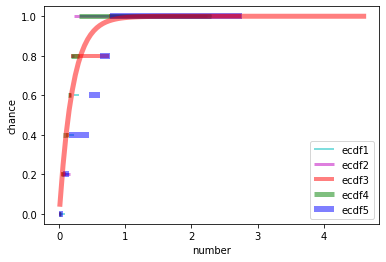

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
def plotty(mas, Volume):
  xmin = []
  xmax = []
  y = []
  i = 0
  sum = 0 
  n = 1
  rgb = 'cmrgb' # добавим цветов графикам 
  # maxxX = max(max(mas)) 
  # print(maxxX)
  # k = np.linspace(0, maxxX,maxxX+1)
  k = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 100)
  while i < len(mas)-1:
    xmin.append(0)
    xmax.append(mas[i][0])
    y.append(0)
    # print('0 if x < ', mas[i][0])
    sum += mas[i][1]
    i+=1
    while mas[i][0] != -1: 
      xmin.append(mas[i-1][0])
      xmax.append(mas[i][0])
      y.append(sum/Volume)
      # print(sum/Volume, 'if in ', mas[i-1][0]," < x <=", mas[i][0])
      sum+= mas[i][1]
      i+=1
    y.append(1)
    xmin.append(mas[i-1][0])
    xmax.append(mas[i-1][0] + 2)
    # print('1 if >', mas[i-1][0])
    i+=1
    sum = 0 
    # print('xmin = ', xmin, 'xmax ',xmax ,'y',y)
    plt.xlabel('number')
    plt.ylabel('chance')
    plt.hlines(y, xmin, xmax, alpha = 0.5, color = rgb[n-1],label = 'ecdf{k}'.format(k = n), lw=n+1)
    n +=1
    ax.legend(loc = 'lower right', frameon=True)
    # тут строить график 
    xmin = []
    xmax = []
    y = [] 
  plt.plot(k,expon.cdf(k, loc=0, scale=1/lam),'r-', lw=5, alpha=0.5, label='expon cdf')
  plt.show()
  # print('xmin = ', xmin, 'xmax ',xmax ,'y',y)


fig,ax = plt.subplots(1,1)      



# print('tuuuuutt ',frequencypoison5)
plotty(frequencyexpan5, len(expan5[1]))



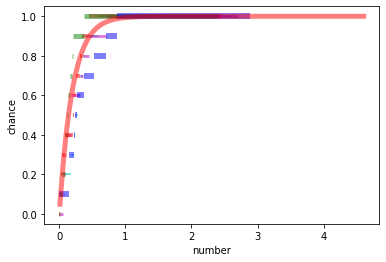

In [0]:
plotty(frequencyexpan10, len(expan10[1]))


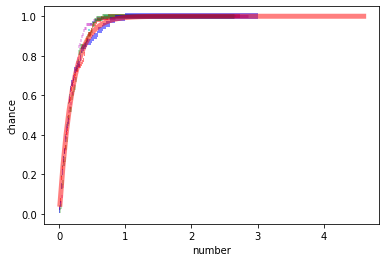

In [0]:
plotty(frequencyexpan100, len(expan100[1]))


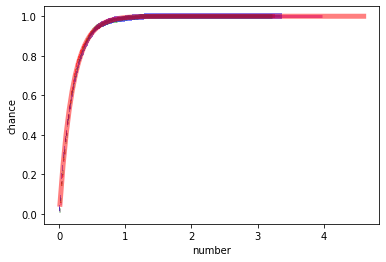

In [0]:
plotty(frequencyexpan1000, len(expan1000[1]))


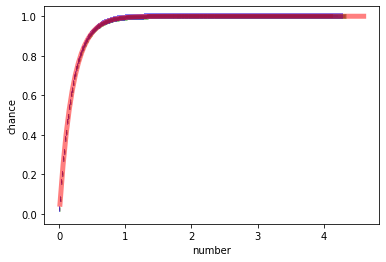

In [0]:
plotty(frequencyexpan10005, len(expan10005[1]))


Тут мы так же видим что при увеличении объема график эмпирической функции стремится к теоритическому 

#### 2.2.7 поиск верхней границы... 

**для n=5**

In [0]:
frequencyexpan5

[[0.09, 1],
 [0.14, 1],
 [0.22, 1],
 [0.3, 1],
 [0.31, 1],
 [-1, -1],
 [0.02, 1],
 [0.16, 2],
 [0.18, 1],
 [0.23, 1],
 [-1, -1],
 [0.03, 1],
 [0.1, 1],
 [0.15, 1],
 [0.17, 1],
 [0.75, 1],
 [-1, -1],
 [0.03, 1],
 [0.05, 1],
 [0.13, 1],
 [0.17, 1],
 [0.3, 1],
 [-1, -1],
 [0.05, 1],
 [0.15, 1],
 [0.45, 1],
 [0.61, 1],
 [0.77, 1],
 [-1, -1]]

In [0]:
list(frequencyexpan5)

[[0.09, 1],
 [0.14, 1],
 [0.22, 1],
 [0.3, 1],
 [0.31, 1],
 [-1, -1],
 [0.02, 1],
 [0.16, 2],
 [0.18, 1],
 [0.23, 1],
 [-1, -1],
 [0.03, 1],
 [0.1, 1],
 [0.15, 1],
 [0.17, 1],
 [0.75, 1],
 [-1, -1],
 [0.03, 1],
 [0.05, 1],
 [0.13, 1],
 [0.17, 1],
 [0.3, 1],
 [-1, -1],
 [0.05, 1],
 [0.15, 1],
 [0.45, 1],
 [0.61, 1],
 [0.77, 1],
 [-1, -1]]

Что бы тут были не 0 вые значения пришлось до 2х чисел после запятой сократить =С 

In [0]:
vverx(frequencyexpan5, len(expan5[1]))

max = 0


**Для 10**

In [0]:
vverx(frequencyexpan10, len(expan10[1]))

max = 0.09999999999999998


**Для 100**

In [0]:
vverx(frequencyexpan100, len(expan100[1]))

max = 0.15000000000000002


**для 1000**

In [0]:
vverx(frequencyexpan1000, len(expan1000[1]))

max = 0.04200000000000004


**Для $10^5$**

In [0]:
# vverx(frequencyexpan10005, len(expan10005[1]))

Что является нормальным явлением, ибо у меня точность числа до 20 знаков после запятой ) 

## 2.3 Построение вариационного ряда выборки

Для каждого n необходимо построить вариационный ряд выборки. В отчете
привести пример для n = 5 и n = 10.
Найти выборочную квантиль уровня 0.1, 0.5, 0.7. Сравнить их с кванти-
лями рассматриваемых распределений.

Вариационный ряд для распределения Пуассона

In [0]:
def sortt(mas):
  for i in range(len(mas)):
    mas[i].sort()
  print(mas)



### Для Пуассона 

#### 2.3.1 Построить вариационный ряд выборки

**Для n = 5**

In [0]:
sortt(poison5)

[[3, 5, 5, 6, 6], [3, 4, 4, 6, 6], [3, 4, 7, 7, 8], [1, 4, 6, 6, 8], [4, 4, 4, 6, 8]]


**Для n = 10**

In [0]:
sortt(poison10)

[[1, 3, 3, 4, 4, 6, 6, 7, 7, 8], [1, 2, 3, 4, 5, 5, 7, 7, 8, 8], [2, 3, 4, 4, 5, 5, 5, 6, 8, 9], [3, 3, 4, 4, 5, 6, 6, 6, 7, 10], [2, 2, 2, 3, 3, 3, 4, 6, 7, 9]]


**Для n = 100**

In [0]:
sortt(poison100)

[[0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 10, 10, 10], [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 10, 10, 12], [0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 10, 11], [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 

**Для n = 1000**

In [0]:
sortt(poison1000)

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

**Для n = $10^5$**

In [0]:
sortt(poison10005)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 2.3.2 Найти выборочную квантиль уровня

Квантили будут выводить падряд 

In [0]:
def quantil(mas, a):
  print(np.quantile(a, np.array(mas), axis=None))

**Для n = 5**

In [0]:
isk  = [0.1, 0.5, 0.7]
np.quantile(poison5, isk)

array([3., 5., 6.])

**Для n = 10** 

In [0]:
np.quantile(poison10, isk)

array([2., 5., 6.])

**Для n =100**

In [0]:
np.quantile(poison100, isk)

array([2., 5., 6.])

**Для n = 1000**

In [0]:
np.quantile(poison1000, isk)

array([2., 5., 6.])

Для n = **$10^5$**

In [0]:
np.quantile(poison10005, isk)

array([2., 5., 6.])

### Для Экспоненциальной 

#### 2.3.3 Построить вариационный ряд выборки 

**n = 5**

In [0]:
sortt(expan5)

[[0.09, 0.14, 0.22, 0.3, 0.31], [0.02, 0.16, 0.16, 0.18, 0.23], [0.03, 0.1, 0.15, 0.17, 0.75], [0.03, 0.05, 0.13, 0.17, 0.3], [0.05, 0.15, 0.45, 0.61, 0.77]]


**n = 10**

In [0]:
sortt(expan10)

[[0.0, 0.02, 0.18, 0.22, 0.24, 0.28, 0.31, 0.36, 0.39, 0.58], [0.06, 0.07, 0.09, 0.1, 0.18, 0.18, 0.32, 0.36, 0.45, 0.71], [0.01, 0.03, 0.04, 0.08, 0.2, 0.22, 0.26, 0.32, 0.35, 0.45], [0.01, 0.04, 0.08, 0.09, 0.11, 0.13, 0.16, 0.19, 0.21, 0.38], [0.0, 0.14, 0.15, 0.22, 0.24, 0.27, 0.37, 0.53, 0.7, 0.88]]


**n = 100**

In [0]:
sortt(expan100)

[[0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.06, 0.06, 0.06, 0.07, 0.07, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.1, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.11, 0.12, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.15, 0.16, 0.16, 0.16, 0.17, 0.17, 0.19, 0.2, 0.21, 0.22, 0.22, 0.22, 0.24, 0.24, 0.25, 0.27, 0.28, 0.29, 0.29, 0.3, 0.3, 0.3, 0.33, 0.36, 0.36, 0.38, 0.4, 0.41, 0.42, 0.43, 0.43, 0.43, 0.43, 0.44, 0.46, 0.47, 0.47, 0.5, 0.54, 0.63, 0.68], [0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.02, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.1, 0.1, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.16, 0.16, 0.17, 0.18, 0.18, 0.18, 0.18, 0.2, 0.2, 0.2, 0.21, 0.22, 0.22, 0.22, 0.23, 0.24,

**n = 1000**

In [0]:
sortt(expan1000)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.

#### 2.3.4 Найти выборочную квантиль уровня 

Уровни квантиля будут выводиться 

**Для n = 5**

In [0]:
isk  = [0.1, 0.5, 0.7]
np.quantile(expan5, isk)

array([0.038, 0.16 , 0.228])

**Для n = 10** 

In [0]:
np.quantile(expan10, isk)

array([0.029, 0.205, 0.313])

**Для n =100**

In [0]:
np.quantile(expan100, isk)

array([0.02, 0.13, 0.24])

**Для n = 1000**

In [0]:
np.quantile(expan1000, isk)

array([0.02, 0.14, 0.24])

Для n = **$10^5$**

In [0]:
np.quantile(expan10005, isk)

array([0.02, 0.14, 0.24])

## 2.4 Построение гистограммы и полигон частот

Для каждого распределения и для каждого n необходимо построить и привести в отчете:
. гистограмму частот
. полигон частот
. сравнение с плотностью распределения для непрерывных распределений и функцией вероятности для дискретных распределений.

### Для Пуассона

#### Гистограмма частот

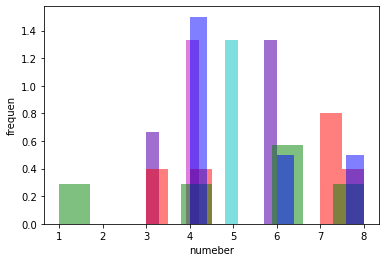

In [0]:
# import itertools
# from collections import Counter
# poison5arr = []
# list(itertools.chain.from_iterable(poison5))
# # sortmas2(list(itertools.chain.from_iterable(poison5)), poison5arr)

# def postroenie(arr):
#   poison5slov = Counter(list(itertools.chain.from_iterable(arr)))
#   print(poison5slov)
#   sum1 = sum(list(itertools.chain.from_iterable(arr)))
#   print(sum1)
#   fig, ax = plt.subplots(1,1) 
import matplotlib.pyplot as plt




def postr1(r):
  fig, ax = plt.subplots(1,1)
  rgb = 'cmrgb'
  t = []
  for k in range(len(r[1])):
    t.append(len(r))
  # print(t)
  for c in range(5):
    plt.hist(r[c], alpha=0.5,color=rgb[c],weights=t, histtype='stepfilled',density=True,label = 'gr{k}'.format(k=c+1))
  plt.xlabel('numeber')
  plt.ylabel('frequen')
    



postr1(poison5)



# postroenie(poison5)

**Для 10**

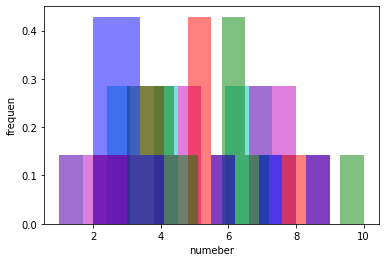

In [0]:
postr1(poison10)

**Для 100**

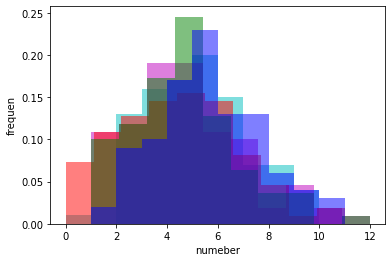

In [0]:
postr1(poison100)

**Для 1000**

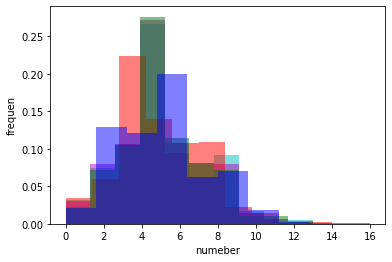

In [0]:
postr1(poison1000)

**Для $10^5$**

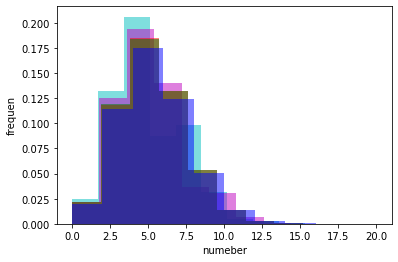

In [0]:
postr1(poison10005)

#### Полигон частот

Полиго́н часто́т (в математической статистике) — один из способов графического представления плотности вероятности случайной величины. Представляет собой ломаную, соединяющую точки, соответствующие срединным значениям интервалов группировки и частотам этих интервалов. **ОК** ни слова больше 

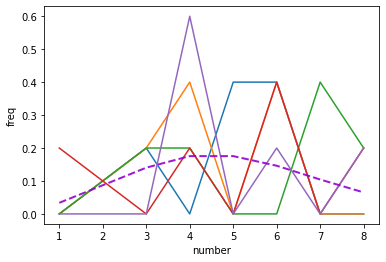

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def poligonqr(mas):
  rgb = 'cmrgb'
  # print(mas)
  uniqq = np.unique(mas)
  fig, ax = plt.subplots(1,1)
  plt.xlabel('number')
  plt.ylabel('freq')
  for i in range(5):
    # print('i = ', i)
    p = []
    for t in uniqq: 
      p.append(mas[i].count(t)/len(mas[1]))
      # print('p', p)
    plt.plot(uniqq, p)
  plt.plot(uniqq, poisson.pmf(uniqq, lam), 'g--',color='darkviolet' ,lw = 2, alpha = 0.9, label= 'PMF')   # из ранее построиного 
  plt.show()


poligonqr(poison5)

**Для 10**

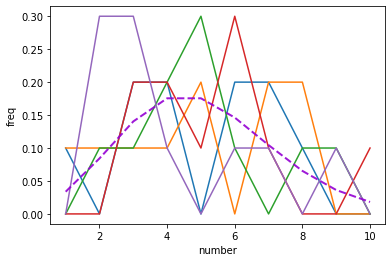

In [0]:
poligonqr(poison10)

**Для 100**

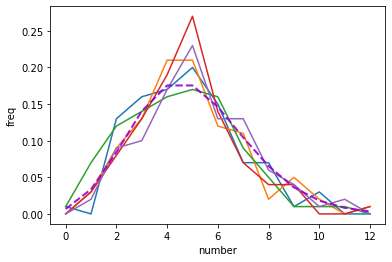

In [0]:
poligonqr(poison100)

**Для 1000**

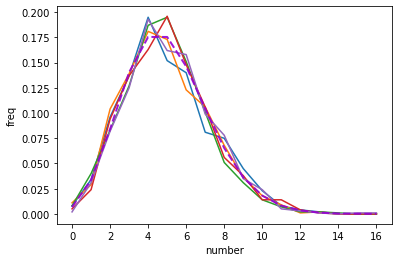

In [0]:
poligonqr(poison1000)

Для $10^5$ 

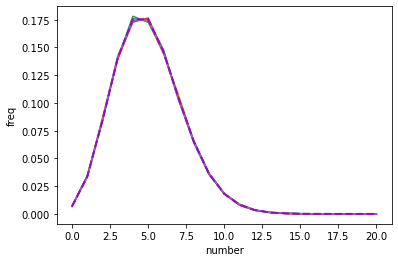

In [0]:
poligonqr(poison10005)

### Для Экспоненциального 

#### Гистограмма частот

**Для 5**

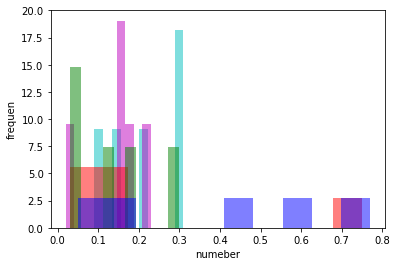

In [0]:
postr1(expan5)

**Для 10**

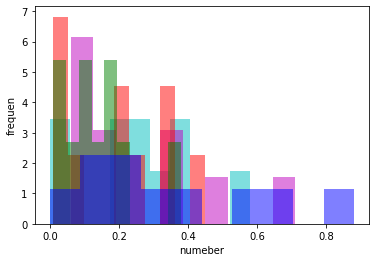

In [0]:
postr1(expan10)

**Для 100**

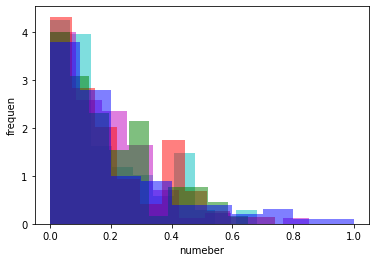

In [0]:
postr1(expan100)

**Для 1000**

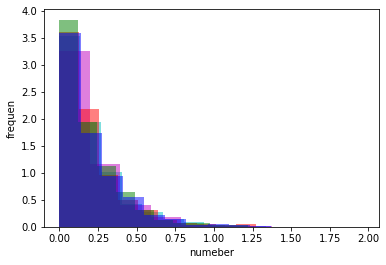

In [0]:
postr1(expan1000)

**Для $10^5$**

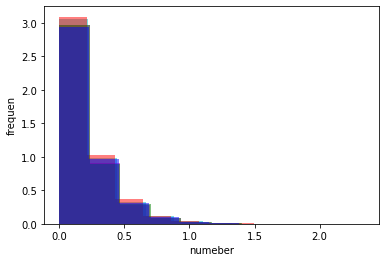

In [0]:
postr1(expan10005)

#### Полигон частот

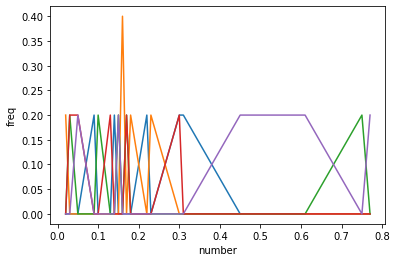

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def poligonqr2(mas):
   # разбиваем на отрезки 
  rgb = 'cmrgb'
  # print(mas)
  uniqq = np.unique(mas)
  fig, ax = plt.subplots(1,1)
  plt.xlabel('number')
  plt.ylabel('freq')
  for i in range(5):
    p = []
    for t in uniqq: 
      p.append(mas[i].count(t)/len(mas[1]))

    plt.plot(uniqq, p)

  # plt.plot(uniqq, list(map(lambda x : x/lam/20 ,expon.pdf(uniqq, loc=0.1, scale=1/lam))), 'g--',color='darkviolet' , lw = 2, alpha = 0.9, label= 'PDF')  
  plt.show()



poligonqr2(expan5)

**Для 5**

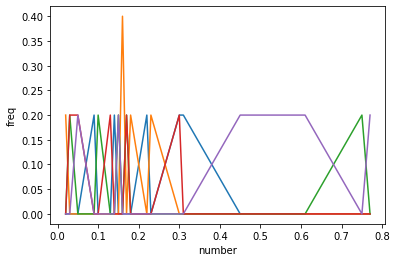

In [0]:
poligonqr2(expan5)

**Для 10**

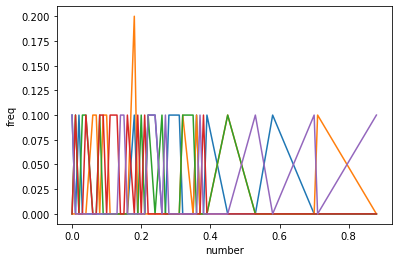

In [0]:
poligonqr2(expan10)

**Для 100**

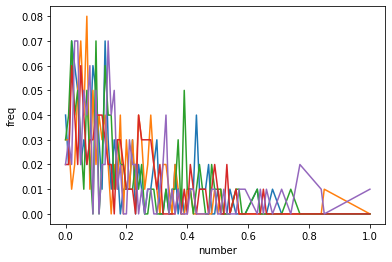

In [0]:
poligonqr2(expan100)

**для 1000**

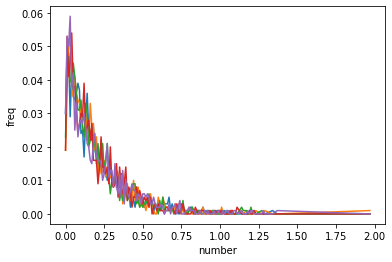

In [0]:
poligonqr2(expan1000)

**Для $10^5$**

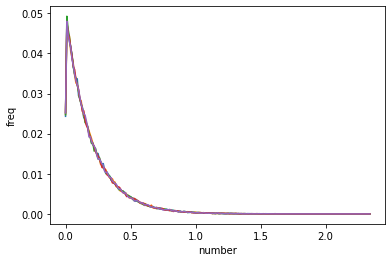

In [0]:
poligonqr2(expan10005)

# Предложения 

# Домашнее задание №3

## 3.1 Выборочное среднее и выборочную дисперсию.
Для каждого из распределений для каждой выработанной во втором домашнем задании выборки найти выборочное среднее и выборочную дисперсию.
Ответить на вопросы
какими свойствами данные оценки обладают?

*   Какими свойствами данные оценки обладают?
*   Также необходимо сравнить истинные значения параметров и значения
их оценок.

Выборочное среднее это $x_в = \sum\limits_{i=1}^k  \frac{n_i x_i}{n} $ при этом надо понимать что у нас по 5 выборок определенного объема ![выборочное среднее по группам](https://c.radikal.ru/c32/1911/c6/3cdc9bc06837.png) 

[С сайта](https://studref.com/502477/matematika_himiya_fizik/vyborochnaya_srednyaya_vyborochnaya_dispersiya) только у них опечатка в конце надо делить на 75 , а не 15 

### Пуассона

#### Выборочное среднее

In [0]:
def targetmean(arr):
  # print(arr)
  summend = 0 
  leng = 0
  sumex = 0
  for i in range(len(arr)):
    leng+=len(arr[i])
    # print('np.unique(arr[i]) =', np.unique(arr[i]))
    for t in np.unique(arr[i]):
      # print('i =',i)
      # print('t =', t)
      # print(arr[i].count(t))
      # print('arr[i][t] = ', arr[i][t],'arr[i].count(arr[i][t])',arr[i].count(arr[i][t]))
      sumex+=(t*(arr[i].count(t)))  
      # print(sumex)
  summend = sumex/leng
  # print('all = ',summend)
  return summend

targetmean(poison5)


4.88

**Для 5**

In [0]:
targetmean(poison5)

4.88

**Для 10**

In [0]:
targetmean(poison10)

4.98

**Для 100**

In [0]:
targetmean(poison100)

5.018

**Для 1000**

In [0]:
targetmean(poison1000)

4.9582

**Для $10^5$**

In [0]:
targetmean(poison10005)

5.003496

In [0]:
poison5

[[7, 3, 5, 6, 4],
 [3, 4, 3, 2, 6],
 [6, 8, 3, 6, 8],
 [2, 3, 5, 3, 10],
 [5, 6, 6, 4, 4]]

In [0]:
siii = 0 # проверял сумму и тд 
for i in range(5):
  siii+=sum(poison5[i])
print(siii)

122


#### Выборочная дисперсия 

Выборочной дисперсией $d_B$ называется среднее арифметическое квадратов отклонений наблюдаемых значений от выборочной средней.Если все значения выборки различны, то:  $d_в = \sum\limits_{i=1}^n \frac{(x_i - x_в)^2}{n}$  
Тут я буду делать без частот. А просто проходя по всем значениям вычитая выборочное среднее и возводя в квадрат, а потом поделю на кол-во элементов.

**Для 5**

In [0]:
def dispersionn(arr): 
  # print('arr ==== ', len(arr) )
  xmean = targetmean(arr)
  print('xmean', xmean)
  summ = 0
  leng = 0  
  for i in range(len(arr)):
    for c in range(len(arr[i])):
      summ += (arr[i][c]-xmean)**2
    leng += len(arr[i])
  # print('kleng = ', leng )
  return summ/leng



dispersionn(poison5)
print('dispersion5 = ', dispersionn(poison5))

xmean 4.88
xmean 4.88
dispersion5 =  3.9456


**Для 10**

In [0]:
dispersionn(poison10)


xmean 4.98


3.9796000000000014

**Для 100**

In [0]:
dispersionn(poison100)


xmean 5.018


5.13367600000001

**Для 1000**

In [0]:
dispersionn(poison1000)


xmean 4.9582


4.769652759999997

**Для $10^5$**

In [0]:
dispersionn(poison10005)


xmean 5.003496


4.99320377797572

Истинное значение распределения Пуассона(математическое ожидание) равно $\lambda$, а я ее выбирал = 5 и мы видими что выборочное среднее стреимтся к $\lambda = 5$. 


Теперь смотрим внимательно на выборочную среднюю. Выборочная средняя – это несмещенная оценка математического ожидания, так как средняя из выборочных средних стремится к своему теоретическому значению по генеральной совокупности. Где она расположена? Правильно, в центре выборки! Средняя всегда находится в центре значений, по которым рассчитана – на то она и средняя. А раз выборочная средняя находится в центре выборки, то из этого следует, что сумма квадратов расстояний от каждого значения выборки до выборочной средней всегда меньше, чем до любой другой точки, в том числе и до генеральной средней. Это ключевой момент. А раз так, то дисперсия в каждой выборке будет занижена. Средняя из заниженных дисперсий  также даст заниженное значение. То есть при многократном повторении эксперимента выборочная дисперсия не будет стремиться к своему истинному значению (как выборочная средняя), а будет смещена относительно истинного значения по генеральной совокупности.


У нас смещенная Дисперсия, теперь посчитаем не смещенную дисперсию. 

[сайт подсказка ](https://statanaliz.info/statistica/opisanie-dannyx/vyborochnaya-dispersiya/)

Выборочная несмещенная дисперсия:
$s_0^2 = \frac{\sum\limits_{i=1}^n(X_i-X_в)}{n-1}$

Для 5


In [0]:
def unbiasedd(arr):
  # print('arr ==== ', len(arr) )
  xmean = targetmean(arr)
  print('xmean', xmean)
  summ = 0
  leng = 0  
  for i in range(len(arr)):
    for c in range(len(arr[i])):
      summ += (arr[i][c]-xmean)**2
    leng += len(arr[i])
  # print('kleng = ', leng )
  return summ/(leng-1)


print('смещенная = ', dispersionn(poison5))
print('Несмещенная = ', unbiasedd(poison5))


xmean 4.88
смещенная =  3.9456
xmean 4.88
Несмещенная =  4.11


**Для 10**

In [0]:
print('смещенная = ', dispersionn(poison10))
print('Несмещенная = ', unbiasedd(poison10))

xmean 4.98
смещенная =  3.9796000000000014
xmean 4.98
Несмещенная =  4.060816326530614


**Для 100**

In [0]:
print('смещенная = ', dispersionn(poison100))
print('Несмещенная = ', unbiasedd(poison100))

xmean 5.018
смещенная =  5.13367600000001
xmean 5.018
Несмещенная =  5.143963927855721


**Для 1000**

In [0]:
print('смещенная = ', dispersionn(poison1000))
print('Несмещенная = ', unbiasedd(poison1000))


xmean 4.9582
смещенная =  4.769652759999997
xmean 4.9582
Несмещенная =  4.770606881376272


**Для $10^5$**

In [0]:
print('смещенная = ', dispersionn(poison10005))
print('Несмещенная = ', unbiasedd(poison10005))

xmean 5.003496
смещенная =  4.99320377797572
xmean 5.003496
Несмещенная =  4.993213764403248


Теперь посмотрим на практическую сторону отличия смещенной и несмещенной дисперсии. Соотношение между выборочной и генеральной дисперсией составляет n/n-1. Несложно догадаться, что с ростом n (объема выборки) данное выражение стремится к 1, то есть разница между значениями выборочной и генеральной дисперсиями уменьшается.

(это мы видим выше ) и дисперсия стремится к своему теоритическому значению $\lambda$ которое у меня = 5 

### Экспоненциального

#### Выборочное среднее

**Для 5**

In [0]:
targetmean(expan5)

0.14880000000000002

**Для 10**

In [0]:
targetmean(expan10)

0.20199999999999996

**Для 100**

In [0]:
targetmean(expan100)

0.17986000000000005

**Для 1000**

In [0]:
targetmean(expan1000)

0.2005840000000001

**Для $10^5$**

In [0]:
targetmean(expan10005)

0.19987989999999975

#### Выборочная дисперсия

**Для 5**

In [0]:
dispersionn(expan5)


xmean 0.14880000000000002


0.03438656

**Для 10**

In [0]:
dispersionn(expan10)


xmean 0.20199999999999996


0.043171999999999995

**Для 100**

In [0]:
dispersionn(expan100)


xmean 0.17986000000000005


0.029154180400000004

**Для 1000**

In [0]:
dispersionn(expan1000)


xmean 0.2005840000000001


0.037969258943999364

**Для $10^5$**

In [0]:
dispersionn(expan10005)


xmean 0.19987989999999975


0.04009914897599445

**Сравним смещенную и не смещенную**

**Для 5**

In [0]:
print('смещенная = ', dispersionn(expan5))
print('Несмещенная = ', unbiasedd(expan5))

xmean 0.14880000000000002
смещенная =  0.03438656
xmean 0.14880000000000002
Несмещенная =  0.03581933333333333


**Для 10**

In [0]:
print('смещенная = ', dispersionn(expan10))
print('Несмещенная = ', unbiasedd(expan10))

xmean 0.20199999999999996
смещенная =  0.043171999999999995
xmean 0.20199999999999996
Несмещенная =  0.04405306122448979


**Для 100**

In [0]:
print('смещенная = ', dispersionn(expan100))
print('Несмещенная = ', unbiasedd(expan100))

xmean 0.17986000000000005
смещенная =  0.029154180400000004
xmean 0.17986000000000005
Несмещенная =  0.02921260561122245


**Для 1000**

In [0]:
print('смещенная = ', dispersionn(expan1000))
print('Несмещенная = ', unbiasedd(expan1000))

xmean 0.2005840000000001
смещенная =  0.037969258943999364
xmean 0.2005840000000001
Несмещенная =  0.037976854314862335


**Для $10^5$**

In [0]:
print('смещенная = ', dispersionn(expan10005))
print('Несмещенная = ', unbiasedd(expan10005))

xmean 0.19987989999999975
смещенная =  0.04009914897599445
xmean 0.19987989999999975
Несмещенная =  0.0400992291744528


Теоритическое значение у экспоненциального это M = $\lambda^{-1}$, у меня это $\lambda = 5 \Rightarrow M = \frac{1}{5}= 0,2$ и мы видим что xmean стремится к 0.2. И дисперсия стремится к своему теоритическому значению $D = \frac{1}{\lambda^{-2}}$, так как у меня $\lambda = 5 \Rightarrow D = \frac{1}{25} = 0,04$ 

## 3.2 Нахождение параметров распределений событий

Для каждого из выбранных распределений необходимо предложить оценку
X для оцениваемого параметра θ и выполнить следующее:


*   Проверить, является преложенная оценка несмещённой.
*   Проверить, является ли предложенная оценка X состоятельной для оцениваемого параметра θ.
*   Проверить, является ли преложенная оценка оптимальной, эффективной. Если нет, то (по возможности) построить оптимальную оценку для
параметра θ.

В данном разделе можно рассмотреть разные способы построения известных статистических оценок а также провести их сравнение. Какими известными свойствами обладают полученные оценки.
Также необходимо сравнить истинные значения оцениваемых параметров
и значения их оценок. Объясните полученные результаты с точки зрения
теории.

### Для Пуассона

**Метод наибольшего правдоподобия**

$P_m(X=x_i) = \frac{\lambda^x_i e^{-\lambda}}{x_i!}$
Найти точечную оценку неизвестного параметра λ распределения Пуассона.

Составим функцию правдоподобия:

$L(\lambda) = \prod\limits_{i = 1}^{n} p(x_i, \lambda) = \prod\limits_{i = 1}^{n} \frac{\lambda^{x_i} e^{-\lambda}}{x_i!} = e^{-\lambda n } \prod\limits_{i = 1}^{n} \frac{\lambda^{x_i}}{x_i!}$ 

$\Rightarrow \ln{(L(\lambda))} = \ln{[e^{-\lambda n } \prod\limits_{i = 1}^{n} \frac{\lambda^{x_i}}{x_i!}]} = \ln{[e^{-\lambda n}]} + \ln{ [ \prod\limits_{i = 1}^{n} \frac{\lambda^{x_i}}{x_i!}]} = -\lambda  n+ \sum\limits_{i=1}^n \ln{(\frac{\lambda^x_i}{x_i!}}) =$

$ =  -\lambda n + \sum\limits_{i=1}^n[\ln{(\lambda^{x_i})} - \ln{(x_i!)}] = - \lambda n + \sum\limits_{i=1}^n[x_i \ln{(\lambda)} - \ln{(x_i!)}]$ 


Услоавия экстремума: 

$\frac{d \ln{L}}{d \lambda} = -n + \sum\limits_{i=1}^n [x_i \frac{1}{\lambda} - 0]  = -n + \frac{1}{\lambda} \sum\limits_{i=1}^n x_i = 0$

$\frac{1}{\lambda} \sum\limits_{i=1}^n x_i = n$ 

$\lambda = \frac{1}{n} \sum\limits_{i=1}^n x_i$ 

Таким образом, в качестве оценки получаем: $\lambda^{*} = \sum\limits_{i=1}^n x_i = x_в$


**Точечная оценка параметра распределения Пуассона**

  Наилучшей точечной оценкой параметра является 

$$\hat{\theta_n} =  \bar{x} = \frac{1}{n} \sum\limits_{i=1}^n x_i , D\bar{x} = D(\frac{1}{n} \sum\limits_{i=1}^{n} x_i) = \frac{1}{n^2} \sum\limits_{i=1}^{n} Dx_i = \frac{1}{n^2}n \theta = \frac{\sigma^2 (\theta)}{n} $$ , а $\lim_{n\to \infty} \frac{\sigma^2 (\theta)}{n} = 0  \Rightarrow $ оценка не смещенная

т.е. $\sigma^2(\theta)=\theta$

$g(\theta) = \int\limits \frac{d \theta }{\sqrt{\theta}} = 2 \sqrt{\theta}$


**Интервальная оценка распределения Пуассона**


Пусть х1, х2, … хn - это независимые наблюдения, каждое из которых распределено по закону Пуассона, т.е. при > 0 вероятность Р, где х = 0,1,2, … и - неизвестный параметр.  Оценим параметр с помощью доверительного интервала.

Тогда доверительный интервал для , соответствующий доверительной вероятности , при достаточно большом n будет иметь вид: 

$P(2 \sqrt{ \hat{\theta_n}} - \frac{1}{\sqrt{n}} u_{\lambda/2} < 2 \sqrt{\hat{\theta_n}} + \frac{1}{\sqrt{n}}u_{\lambda/2}) = 1 - \lambda $  


для любого значения . Поэтому, если n достаточно велико и , то

$2\sqrt{\bar{x}} - \frac{1}{\sqrt{n}}u_{\lambda/2} > 0$

$(\sqrt{\bar{x}} - \frac{1}{2\sqrt{n}} u_{\lambda/2})^2 < \theta < (\sqrt{\bar{x}} + \frac{1}{2\sqrt{n}} u_{\lambda/2})^2$

**Распределение Пуассона относится к экспоненциальному семейству с характеристиками: **

$\overline{B(x)} = \overline{x}, M_\lambda\overline{B(\xi)} = \lambda, I(\lambda) = \frac{1}{\lambda}$

Уравнение правдоподобия имеет вид $\overline{x} = \lambda$

У него решение: $\lambda^{*}_{мп} = \overline{x}$, при этом $M\lambda^{*}_{мп}=\lambda$.

Таким образом, данная оценка является несмещенной, оптимальной, состоятельной, асимтотически нормальной: 

$\lambda^{*}_{мп} \stackrel{АС}{\in} N(\lambda,\frac{\lambda}{n})$.

Для любого n = 1,2,... в силу устойчивости распределения Пуассона:
$$ n\lambda^{*}_{мп} = n \overline{\xi} \in Пуассан(\lambda n)$$

Рассмотрим 2-е функции от $\lambda$, где $\lambda$ является параметром и найдем для них МП-оценки =D 

1) $t_1(\lambda) = \lambda^{k}$

По отпределению: $(\lambda^k)^{*}_{мп} = (\overline{\xi})^{k} \stackrel{АС}{\in} N (\lambda^k, \frac{k^2 \lambda^{2k-1}}{n})$

Эта оценка является асимптотически несмещенной, состоятельной, асимптотически оптимальной, и даже асимптотически нормальной при любом значении k, где как положительное, так и отрицательное. 

2) $t_2(\lambda) = p_{\xi}(x|\lambda) = \frac{\lambda^{x}}{x!}e^{-\lambda}$ , x = 0,1,2,... 

По опр.: $[p_\xi(x|\lambda)]^{*}_{МП} = \frac{(\lambda^{*}_{МП})}{x!} e^{-\lambda^{*}_{МП}}, x=0,1,2,...$
 
А по сл-вам МП оценки она явл. состоятельной, асимп. несмещенной, асимп. оптимальной, асимп. нормальной. Если x = 0

$e^{-\lambda^{*}_{МП}} \stackrel{AC}{\in} N(e^{-\lambda}, \frac{\lambda e^{-2\lambda}}{n})$

Дополнение:  $\theta: p(x|\theta) = \frac{\theta^k }{k!} e^{-\theta},x=0.2$

$$L = \prod_{i-1}^{n} \frac{\theta^{x_i}}{x_i!}e^{-\theta} = (\prod_{i=1}^{n} \frac{1}{x_i!}) e^{-n\theta} \theta^{n \overline{x}}$$

$$ \frac{\partial{\ln{L}}}{ \partial{\theta}} = -n + \frac{n \overline{x}}{\theta}(\overline{x}-\theta)$$, при $A = \frac{n}{\theta}, t = \overline{x}, \tau(\theta)=\theta \Rightarrow \overline{x}$ - эффективная и не смещенная оценка для $\theta$ (она единственна по определению ) (Сидняев Н.И., Мельникова Ю.С. «Оценки статистических параметров распределений» доказано тут), и $D\overline{x} =  |\frac{\tau'(\theta)}{A(\theta)}| = \frac{\theta}{n}$ 

### Для экспоненциального

**Интервальная оценка параметра экспоненциального распределения**

$$
\begin{equation*}
f(x) = 
 \begin{cases}
   \lambda e^{-\lambda} &\text{$ x \geq 0$}\\
   0 &\text{$x < 0$}
 \end{cases}
\end{equation*}$$

Характеристики экспоненциального расределения: 

Мат ожидание: $M[x]= \frac{1}{\lambda}$

Дисперсия: $D[x]= \frac{1}{\lambda^2}$ 

Для интервальной оценки эксп распределения введем центральную статистику вида 

$T(\vec{X_n},\lambda) = 2\lambda n \overline{x}$, запомним это под цифрой (1) где $\overline{x} = \frac{1}{n} \sum\limits_{i=1}^{n} x_i$ - выборочное среднее реализации $\vec{X_n}$ 

Статистика (1) имеет $\chi^2$ распределен с 2n степенями свободы. По ф-ции распределения найдем квантили для уровней $\alpha$ и $\beta$, таких, что $\gamma = 1-\alpha - \beta$, $\gamma$ - доверительная вероятность. Границы доверительного интервала определяются из уравнений: $2\lambda_i n \overline{x} = \frac{\chi^2_\lambda(2n)}{2n\overline{x}}$, $\lambda_\alpha = \frac{\chi^2_{1-\beta}(2n)}{2n \overline{x}}$



---



Показательное распределение $p(x|\theta) = \theta e^{-\theta x}, x>0$

$$L = \prod_{i-1}^n \theta e^{-\theta x_i} = \theta^n e^{-\theta\sum x_i}; \ln{L}= n\ln{\theta}-n\theta\overline{x}$$

$$\frac{\partial \ln{L}}{\partial \theta} = \frac{n}{\theta} - n \overline{x} = -n(\overline{x} - \frac{1}{\theta})$$, при $\tau(\theta) = \frac{1}{\theta}; \grave{A} -n ; t = \overline{x}$ получаем $\frac{\partial{\ln{L}}} {\partial{\theta}} = \grave{A}(t-\tau(\theta))$

Следовательно, $\overline{x} - $ эффективная и несмещенная оценка для $\tau(\theta)=\frac{1}{\theta}$ и $D\overline{x}= |\frac{\tau'(\theta)}{A(\theta)}| = \frac{1}{n\theta^2}$

 **ОЦЕНИВАНИЕ ПАРАМЕТРА ПОКАЗАТЕЛЬНОГО РАСПРЕДЕЛЕНИЯ ПО УСЕЧЁННОЙ ВЫБОРКЕ**

 Для случайной величины  X , имеющей показательное распределение, вероятность 
 $P(X \geq a) = 1 -F(a) = e^{-\lambda a}$ Тогда при x > a плотность распределения $f(x|X \geq a) = \frac{\lambda e^{-\lambda x}}{e^{-\lambda a}} = \lambda e^{-\lambda (x-a)} $. Таким образом, если случайная величина имеет показательное распределение, то усеченное распределение $f(x|X \geq a )$ не что иное, как СДВИНУТОЕ экспоненциальное распределение $ f(x-a) = \lambda e^{-\lambda(x-a)}$, где a - параметр сдвига! это левая часть сдвига нашей выборки :3 


 Для оценки параметра $\lambda$ воспользуемся методом максимального правдоподобия. 

 Ф.П. имеет вид 

 $$L(x_1,...,x_xn;\lambda) = \prod_{i=1}^{n}f(x|X>a) = \prod_{i=1}^{n} \lambda e^{-\lambda (x-a)}$$, тогда из уравнения правдоподобия $$\frac{d \ln{L(x_1,...,x_n;\lambda)}}{d \lambda} = \frac{n}{\lambda} + na - \sum_{i=1}^{n}x_i=0$$ следует, что оценка $\lambda^{*}$ параметра $\lambda$ может быть определена по формуле $$\lambda^{*} = \frac{n}{-na + \sum\limits_{i=1}^{n} x_i} $$ 

 Исходя из того, что вероятностные характеристики показательного распределения равны $m=\frac{1}{\lambda} $ и $ \sigma_x=\frac{1}{\lambda}$, получим 

 $$ m_x^{*} = \frac{1}{\lambda^{*}} = -a +\frac{1}{n} \sum\limits_{i=1}^{n} x_i = \frac{1}{n} \sum\limits_{i=1}^{n} (x_i-a)$$ 



 В этои выражении $(x_i - a)$ - сдвинутые на величину a значения показательнораспределенных с.в. $(X_i-a)$ с тем же параметром $\lambda$. При композиции показательных распределенеий с параметром $\lambda$ получается гамма-распределение, $\Rightarrow nM^{*}_x = \sum\limits_{i=1}^{n}(X_i-a)$  имеет гамма  распределение с параметрами $\lambda$ и n. Умножение этой с.в. на $2\lambda$ имеет гамма распределение с параметрами $\frac{1}{2}$ и n, $\chi ^2$ это распределение Пирсона с 2n степенеями свободы. 

 Определим доверительный интервал для $m_x$, зададимся доверительной вероятностью, равной $\beta$ $$ \frac{2nm_x^{*}}{\chi_{2n, \frac{1-\beta}{2}}^2}\leq m_x \leq \frac{2nm_{x}^{*}}{\chi_{2n,\frac{1+\beta}{2}}^{2}}$$

Где $\chi_{2n,\frac{(1-\beta)}{2}}^{2} $ и $\chi_{2n,\frac{1+\beta}{2}}^{2}$ - квантили $\chi^2$ это распределение Пирсона

Расмотрим является ли оценка $\lambda^{*}$ (полученная ранее) несмещенной, преобразуем к виду 

$$\lambda^{*} = \frac{n}{-na +\sum\limits_{i=1}^{n}x_i} = \frac{n}{\sum\limits_{i=1}^{n}(x_i-a)}$$ Пусть $Y = \sum\limits_{i=1}^{n}(X_i-a)$ Так как с.в. Y является суммой независимых n с.в., каждая из которых имеет показательное распределеине $\lambda$, то это Гамма распределеине с плотностью $f_y(y) = \frac{\lambda^n y^{n-1}}{Г(n)} e^{-\lambda y}$ при $y \geq 0$, ult Г(n) - гамма функция Эйлера. $\Rightarrow$ мат. ожидание оценки параметра $\lambda$ $$M[\Lambda^{*}]=M[\frac{n}{Y}] = n \int\limits_{0}^{\infty} \frac{1}{y} f_y(y)dy = \frac{\lambda n}{n-1}$$ \Rightarrow$$, оценка $\lambda^{*}$ является смещенной оценкаой параметра $\lambda$.А что бы она была несмещенной, домножим: 


$$\lambda_{несмещ}^{*} = \frac{n-1}{\sum\limits_{i=1}^{n}(x_i-a)}$$ Тогда доверительный интервал для параметра $\lambda$ будет


$$\frac{\chi_{2n,\frac{1+\beta}{2}}^{2} \cdot \lambda_{несмещ}^{*}}{2(n-1)} \leq \lambda \leq \frac{\chi_{2n,\frac{1-\beta}{2}}^{2} \cdot \lambda_{несмещ}^{*}}{2(n-1)} $$

## 3.3 Работа с данными

Данные я буду использовать [эти](https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3). Для типичной интерпретации распределения Пуассона( о котором вы можете почитать в моем пдф файле в пункте 1.3 поиск примеров ... ) 

В другом файле по [ссылке](https://colab.research.google.com/drive/1x0xQMqTMj19ToyWTVAF8m_6xSYz7Kzrk)